This code calculates the impact aggregated over the three soil layers for selected crops and displays it as a raster.

In [1]:
import os
import mypackages.myrasters as mr
import numpy as np
import fiona
import pandas as pd
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [2]:
data_dir = os.path.join('..', 'data')
cf_dir = os.path.join('..', 'output/characterization_factors')

In [3]:
shapefile_name = 'shapefiles/countries.shp'
shapefile = os.path.join(data_dir, shapefile_name)

Read in the characterization factor rasters:

In [4]:
ts_raster = mr.MyRaster(os.path.join(cf_dir, 'ts_100yrs.tif'))
ms_raster = mr.MyRaster(os.path.join(cf_dir, 'ms_100yrs.tif'))
bs_raster = mr.MyRaster(os.path.join(cf_dir, 'bs_100yrs.tif'))

### Plot:

In [5]:
gdf = gpd.read_file(shapefile)

In [7]:
ts = ts_raster.get_masked_array()

In [8]:
bs = bs_raster.get_masked_array()

In [9]:
np.percentile(ts, 98)

0.00050540000665932894

In [10]:
np.percentile(bs, 98)

0.0018899999558925629

In [11]:
vmin = 0
vmax = np.percentile(bs, 98)

In [12]:
cmap = 'RdYlGn_r'

In [13]:
def createColourbar(lwr, upr):
    """Create a colourbar with limits of lwr and upr"""
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", size="2%", pad=0.1)
    norm = matplotlib.colors.Normalize(vmin = lwr, vmax = upr, clip = False)

    c = matplotlib.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm)
    return c

CPU times: user 33.4 s, sys: 9.3 s, total: 42.7 s
Wall time: 42.7 s


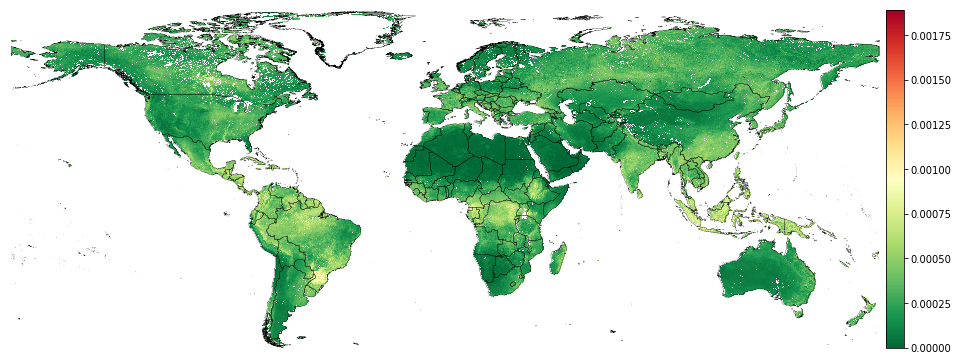

In [14]:
%%time

fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111)

ax.set_xlim([-180, 180])
ax.set_ylim([-56, 84])
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

gdf.plot(ax=ax, facecolor='none', edgecolor='#000000', linewidths=0.3)

ax.imshow(ts, extent=[-180, 180, -56, 84], cmap=cmap, vmin=vmin, vmax=vmax)

c = createColourbar(vmin, vmax)

plt.savefig(os.path.join(cf_dir, 'ts_100yrs.png'),
            dpi=300, bbox_inches='tight', pad_inches=0.1)

In [15]:
ms = ms_raster.get_masked_array()
#vmin = 0
#vmax = ms.max()

CPU times: user 32.2 s, sys: 9.83 s, total: 42 s
Wall time: 42 s


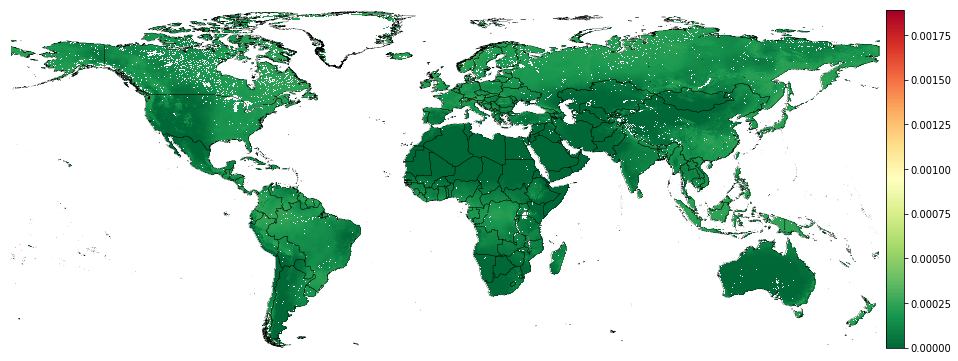

In [16]:
%%time

fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111)

ax.set_xlim([-180, 180])
ax.set_ylim([-56, 84])
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

gdf.plot(ax=ax, facecolor='none', edgecolor='#000000', linewidths=0.3)

ax.imshow(ms, extent=[-180, 180, -56, 84], cmap=cmap, vmin=vmin, vmax=vmax)

c = createColourbar(vmin, vmax)

plt.savefig(os.path.join(cf_dir, 'ms_100yrs.png'),
            dpi=300, bbox_inches='tight', pad_inches=0.1)

In [17]:
#bs = bs_raster.get_masked_array()
#vmin = 0
#vmax = bs.max()

CPU times: user 33 s, sys: 9.04 s, total: 42.1 s
Wall time: 42.1 s


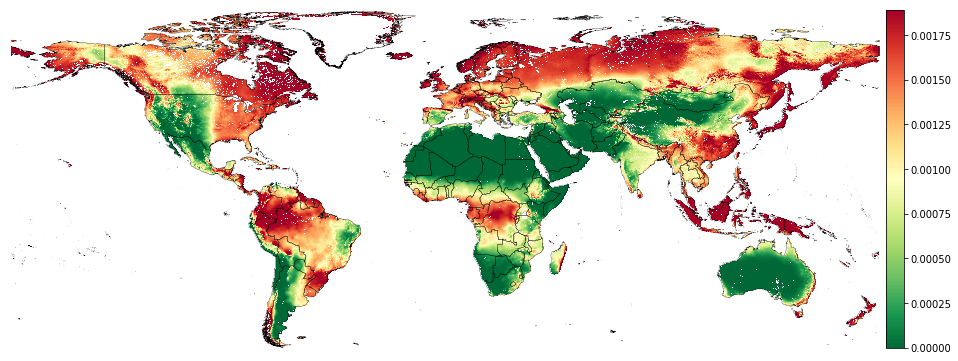

In [18]:
%%time

fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111)

ax.set_xlim([-180, 180])
ax.set_ylim([-56, 84])
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

gdf.plot(ax=ax, facecolor='none', edgecolor='#000000', linewidths=0.3)

ax.imshow(bs, extent=[-180, 180, -56, 84], cmap=cmap, vmin=vmin, vmax=vmax)

c = createColourbar(vmin, vmax)

plt.savefig(os.path.join(cf_dir, 'bs_100yrs.png'),
            dpi=300, bbox_inches='tight', pad_inches=0.1)